# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Niko Febrianur
- Email: nikofebrianur@gmail.com
- Id Dicoding: nikofebrianur

## Menentukan Pertanyaan Bisnis

- Kategori produk apa saja yang memiliki review paling bagus (skor 5) di tahun 2018 dengan harga lebih dari USD 2000?
- Metode pembayaran apa yang paling banyak digunakan pelanggan untuk membeli barang berharga lebih dari USD 1000?



## Menyiapkan semua library yang dibutuhkan

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [117]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/MyDrive/Kaggle Datasets/E-Commerce Public Dataset'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
cp: missing destination file operand after '/content/gdrive/MyDrive/Kaggle Datasets/E-Commerce Public Dataset'
Try 'cp --help' for more information.


####Products Data



> Membuat dataframe dari dataset products_dataset.csv



In [118]:
products_df = pd.read_csv("/content/gdrive/MyDrive/Kaggle Datasets/E-Commerce Public Dataset/products_dataset.csv")
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


####Orders Data



> Membuat dataframe dari dataset order_items_dataset.csv



In [119]:
order_items_df = pd.read_csv("/content/gdrive/MyDrive/Kaggle Datasets/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40





> Membuat dataframe dari dataset order_payments_dataset.csv



In [120]:
order_payments_df = pd.read_csv("/content/gdrive/MyDrive/Kaggle Datasets/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95




> INNER JOIN dataframe order_items_df dengan order_payments_dataset_df



In [121]:
merged_order_items_payments_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
merged_order_items_payments_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,1,boleto,1,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,1,credit_card,1,31.75
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,1,credit_card,10,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1,credit_card,3,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,1,credit_card,1,65.39




> Membuat dataframe dari dataset order_reviews_dataset.csv



In [122]:
order_reviews_df = pd.read_csv("/content/gdrive/MyDrive/Kaggle Datasets/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47




> Membuat dataframe dari dataset orders_dataset_dataset.csv



In [123]:
orders_df = pd.read_csv("/content/gdrive/MyDrive/Kaggle Datasets/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00




> INNER JOIN dataframe order_reviews_df dengan orders_df



In [124]:
merged_order_reviews_df = pd.merge(
    left=order_reviews_df,
    right=orders_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
merged_order_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,eecafc3ff695f031bfe354a9fff9d437,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03 00:00:00
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34,840be0730010e9580efd289bc9f37706,delivered,2017-06-30 15:38:46,2017-06-30 15:50:17,2017-07-03 16:22:53,2017-07-15 12:57:24,2017-08-03 00:00:00
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06,98f485515e575607a8003b17e91990bd,delivered,2018-08-07 23:12:29,2018-08-07 23:25:10,2018-08-08 14:18:00,2018-08-13 18:08:28,2018-10-10 00:00:00
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37,daf813bc2e41c86027d086e8dfb35571,delivered,2017-05-08 13:35:48,2017-05-08 13:50:15,2017-05-09 14:19:29,2017-05-16 16:49:51,2017-05-30 00:00:00
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,a5224bdc7685fd39cd7a23404415493d,delivered,2018-05-14 10:29:02,2018-05-15 10:37:47,2018-05-15 13:29:00,2018-05-21 17:52:12,2018-06-06 00:00:00




> INNER JOIN dataframe merged_order_items_payments_df dengan merged_order_reviews_df



In [125]:
orders_data_df = pd.merge(
    left=merged_order_items_payments_df,
    right=merged_order_reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_data_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,1,boleto,1,...,NaN,2017-05-23 00:00:00,2017-05-24 19:00:09,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,1,credit_card,1,...,NaN,2017-12-19 00:00:00,2017-12-29 02:40:12,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,1,credit_card,10,...,NaN,2018-07-10 00:00:00,2018-07-11 20:14:25,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25 00:00:00
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1,credit_card,3,...,Na descrição do produto quando fui efetuar a c...,2018-03-30 00:00:00,2018-04-02 00:52:01,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29 00:00:00
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,1,credit_card,1,...,NaN,2018-07-05 00:00:00,2018-07-05 23:17:04,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23 00:00:00


### Assessing Data

####Products Data



> Mendapatkan info column pada dataframe products_df



In [126]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB




> Mendapatkan informasi terkait missing value di dataframe products_df



In [127]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


> Mendapatkan informasi terkait duplikasi di dataframe products_df




In [128]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0




> Mendapatkan rangkuman parameter statistik dari dataframe products_df



In [129]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Orders Data

> Mendapatkan info column pada dataframe products_df



In [130]:
orders_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   order_item_id                  117329 non-null  int64  
 2   product_id                     117329 non-null  object 
 3   seller_id                      117329 non-null  object 
 4   shipping_limit_date            117329 non-null  object 
 5   price                          117329 non-null  float64
 6   freight_value                  117329 non-null  float64
 7   payment_sequential             117329 non-null  int64  
 8   payment_type                   117329 non-null  object 
 9   payment_installments           117329 non-null  int64  
 10  payment_value                  117329 non-null  float64
 11  review_id                      117329 non-null  object 
 12  review_score                  

> Mengubah tipe data price ke integer



In [131]:
orders_data_df['price'] = orders_data_df['price'].astype(int)
orders_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   order_item_id                  117329 non-null  int64  
 2   product_id                     117329 non-null  object 
 3   seller_id                      117329 non-null  object 
 4   shipping_limit_date            117329 non-null  object 
 5   price                          117329 non-null  int64  
 6   freight_value                  117329 non-null  float64
 7   payment_sequential             117329 non-null  int64  
 8   payment_type                   117329 non-null  object 
 9   payment_installments           117329 non-null  int64  
 10  payment_value                  117329 non-null  float64
 11  review_id                      117329 non-null  object 
 12  review_score                  

> Mendapatkan informasi terkait missing value di dataframe products_df





In [132]:
orders_data_df.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
dtype: int64



> Mendapatkan informasi terkait duplikasi di dataframe orders_data_df



In [133]:
print("Jumlah duplikasi: ", orders_data_df.duplicated().sum())

Jumlah duplikasi:  0




> Mendapatkan rangkuman parameter statistik dari dataframe orders_data_df



In [134]:
orders_data_df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score
count,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,1.194121,119.921776,20.027514,1.094452,2.940151,172.062565,4.031467
std,0.684225,183.011155,15.828077,0.731174,2.775370,265.388194,1.387927
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,39.000000,13.080000,1.000000,1.000000,60.750000,4.000000
50%,1.000000,74.000000,16.280000,1.000000,2.000000,108.100000,5.000000
75%,1.000000,134.000000,21.180000,1.000000,4.000000,189.060000,5.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000


### Cleaning Data

####Products Data

In [135]:
products_df.dropna(axis=0, inplace=True)
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [136]:
products_data = products_df[['product_id','product_category_name']]

In [137]:
products_data.describe()

,product_id,product_category_name
count,32340,32340
unique,32340,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


####Orders Data

In [138]:
orders_data_df.dropna(axis=0, inplace=True)
orders_data_df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [139]:
orders_data = orders_data_df[['order_id','product_id','price', 'payment_type','review_score','order_purchase_timestamp']]

In [140]:
orders_data.describe()

,price,review_score
count,11652.000000,11652.000000
mean,130.308445,3.791452
std,210.459892,1.566406
min,0.000000,1.000000
25%,40.000000,3.000000
50%,79.000000,5.000000
75%,139.000000,5.000000
max,4590.000000,5.000000


## Exploratory Data Analysis (EDA)



> Mendapatkan jumlah total produk unik dengan skor review 5



In [141]:
orders_data.groupby(by="review_score").product_id.nunique().sort_values(ascending=False)

review_score
5    3780
1    1376
4    1187
3     675
2     437
Name: product_id, dtype: int64



> Mendapatkan produk id dengan skor review 5



In [142]:
best_reviewed_products_id_df = orders_data[orders_data['review_score'] == 5]
best_reviewed_products_id_df

,order_id,product_id,price,payment_type,review_score,order_purchase_timestamp
12,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,74,credit_card,5,2018-07-24 17:04:17
28,00130c0eee84a3d909e75bc08c5c3ca1,89321f94e35fc6d7903d36f74e351d40,27,boleto,5,2018-06-11 21:17:00
59,0025c5d1a8ca53a240ec2634bb4492ea,35537536ed2b4c561b4018bf3abf54e0,390,credit_card,5,2018-07-08 09:17:59
102,0039500db36d50d7d0bfaf23723550f3,62984ea1bba7fcea1f5b57084d3bf885,169,credit_card,5,2018-07-06 10:37:32
105,003cc6161d7a2593f2525cce0c330d32,fadc89c2a60ff96b18827644074dfd70,85,credit_card,5,2018-08-03 19:33:35
...,...,...,...,...,...,...
117192,ffad90ea25b9d744b18f8079de0b988d,cab49aa7c76189e7e6d55ad8c7f9eb91,82,credit_card,5,2018-04-30 20:14:39
117233,ffc2926aeab97ab6dc7585276c9b9371,1bfb290d7273a442c874dbe74b4abae6,69,boleto,5,2018-04-13 09:29:56
117236,ffc49b9c9d666410e9ecdb0a3efadb9c,f96ff9b997681965689f78bef092fdd9,765,credit_card,5,2018-05-28 19:29:49
117242,ffcb98e21b0bf085baf42b16a67732ef,0c398b245c9b74ef2bf4343b6fe73237,91,credit_card,5,2018-06-06 14:25:51




> Mendapatkan nama kategori produk dengan skor review 5 dengan menggabungkan kedua dataframe



In [143]:
best_product_by_review_df = pd.merge(
    left=products_data,
    right=best_reviewed_products_id_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
best_product_by_review_df.head(10)

,product_id,product_category_name,order_id,price,payment_type,review_score,order_purchase_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10,debit_card,5,2018-04-24 16:16:53
1,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,a4425e2bccba621150a07a685cf063be,41,credit_card,5,2018-06-26 14:27:52
2,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,a4425e2bccba621150a07a685cf063be,41,credit_card,5,2018-06-26 14:27:52
3,d03bd02af9fff4b98f1c972315e5e9ef,moveis_decoracao,0a4581df52d24b72b87ae0feb1b11d08,79,credit_card,5,2018-05-11 13:28:31
4,d03bd02af9fff4b98f1c972315e5e9ef,moveis_decoracao,4ed7a5d31f58c9c3b20a61e3927db6d9,79,credit_card,5,2018-05-07 23:25:09
5,d03bd02af9fff4b98f1c972315e5e9ef,moveis_decoracao,c12bef4c2199585f7a1f2c92fdac3827,69,credit_card,5,2018-08-06 17:46:34
6,1c6fb703c624b381a20f21f757694866,brinquedos,2f53e1db0b2a17564ef12fe69d65a9df,97,credit_card,5,2018-05-09 13:49:19
7,3e9b58f1436820c248d3f98d7229bb14,relogios_presentes,d39e59e93bf34f4b2f6cef3902672a6f,99,credit_card,5,2018-04-19 00:16:08
8,0d009643171aee696f4733340bc2fdd0,perfumaria,a84a0bd528e053f6b266e21bb1111e3f,319,credit_card,5,2018-07-03 19:27:58
9,be1be330cf34043d1c40d6114cbd11b5,relogios_presentes,86f409689bcc6848577f53fcfa1154eb,149,credit_card,5,2018-04-29 17:29:45




> Mendapatkan jumlah total tipe metode pembayaran



In [144]:
orders_data.groupby(by="payment_type").product_id.nunique().sort_values(ascending=False)

payment_type
credit_card    4994
boleto         1411
voucher         329
debit_card      277
Name: product_id, dtype: int64


> Mendapatkan produk berharga lebih dari USD 1000



In [145]:
price_gt_1000_df = orders_data[orders_data['price'] > 1000]
price_gt_1000_df

,order_id,product_id,price,payment_type,review_score,order_purchase_timestamp
884,02014f2495eef0e869616829d481d743,43cc8e4d981bc04b9d78b12e8a908d41,1240,credit_card,5,2018-08-22 10:53:16
1143,029c545413b10a6bd7540401f6eef0a3,8d4e92265a16e69a1e1d76e67e46d72f,1350,credit_card,1,2018-07-10 17:16:33
2627,05c32785b5245ab31eb5bc6b0d41f698,ef854c7d98d5eba672287b0a9d37075b,1990,credit_card,4,2018-05-12 22:16:52
2811,062bddc5be851fec2b59598cc33498cd,b1035b3d307f0aeb6157fdd3e09f8119,1520,credit_card,1,2018-05-07 20:22:07
2926,066da535b01be4b26ca70864a62d92e1,25c38557cf793876c5abdd5931f922db,1106,boleto,1,2018-04-07 23:44:38
...,...,...,...,...,...,...
115090,fb2e0a2eb0a7cd9fc655c3fdda628acc,5ec9cc4e1217d387b9fedfa362b7bc24,1788,credit_card,2,2018-07-30 10:17:54
115380,fbc8e8d5591dc594ede3b88033625bd0,89ad4d91b311611f135ef67426267ffc,1999,credit_card,5,2018-08-16 23:24:34
115498,fc0b3be9d66d6db8d306c15407ece0d7,933f4f76eae38d2a97ecfb7c6355f0bc,1299,credit_card,5,2018-06-16 20:45:44
116466,fe1b32a1829b1ddd26415d31fbf85b78,6a02077065f9af692480ab01fbff66d2,1199,credit_card,3,2018-07-05 00:40:06


In [146]:
price_gt_1000_payment_type_df = pd.merge(
    left=products_data,
    right=price_gt_1000_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
price_gt_1000_payment_type_df.head(10)

,product_id,product_category_name,order_id,price,payment_type,review_score,order_purchase_timestamp
0,f14aa2ba817ef24ccf7f99c0ccfab59a,relogios_presentes,d4148052141383039b68bbb6bd525f3b,1200,credit_card,1,2018-03-20 18:09:48
1,5ec9cc4e1217d387b9fedfa362b7bc24,automotivo,fb2e0a2eb0a7cd9fc655c3fdda628acc,1788,credit_card,2,2018-07-30 10:17:54
2,bdb0b11a36aed4d0d862a7037c838560,telefonia,d97ceab969b84967a5c136683ab0625e,1099,credit_card,5,2018-07-18 19:35:02
3,cc3181a81384b6fc34602d49cb6068a6,eletrodomesticos_2,2b72a32a2c3e93fa260ca7655073886f,1148,credit_card,5,2018-04-18 15:40:36
4,bd9fca6bf4bdcbf4094d7bc11415dfe5,eletroportateis,d1ea13fc1406243e6f6134582bf1bbc5,1399,credit_card,5,2018-05-19 18:18:10
5,57c9362442482cd2451f2eabf468e532,relogios_presentes,446461e627059dcc66c0d83df1d3fadf,1099,credit_card,5,2018-05-07 22:48:45
6,06cd420a1b028388e0bf1f78daf20411,ferramentas_jardim,d4571886185581e35543a4c104bd0cd4,1069,credit_card,5,2018-05-08 09:27:13
7,15151e8a937f6a4d1a4f0c03c765c6f2,ferramentas_jardim,2ec398158cb686267b1f4b102129098e,2749,credit_card,1,2018-04-28 12:23:26
8,2f465f0f879ab88842042a85bac3a937,moveis_escritorio,43070b94b6d741a764e8e1ba4a2ea91d,1189,credit_card,3,2018-05-22 20:33:27
9,7926c1689244625162673c66b4196371,bebes,693c6ae1a1ab759aae8dd08ff9eff189,1168,credit_card,5,2018-06-08 12:12:36


## Visualization & Explanatory Analysis

### Kategori produk apa saja yang memiliki review paling bagus (skor 5) di tahun 2018 dengan harga lebih dari USD 2000?




> Mendapatkan semua nama kategori produk dengan skor review 5 dengan harga lebih dari USD 2000 di tahun 2018



In [147]:
df = best_product_by_review_df
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
top_products = df[(df['price'] > 2000) & (df['order_purchase_timestamp'].dt.year == 2018)]
unique_categories = top_products.drop_duplicates(subset='product_category_name')
unique_categories[['product_category_name','review_score','price']]

,product_category_name,review_score,price
1529,construcao_ferramentas_seguranca,5,2062
2079,eletronicos,5,2470
2411,esporte_lazer,5,2999
2608,eletrodomesticos_2,5,2110
3051,ferramentas_jardim,5,2550
3116,relogios_presentes,5,2399
4572,cool_stuff,5,2139
4637,pcs,5,4590
4879,construcao_ferramentas_construcao,5,2300
4894,beleza_saude,5,2699




> Membuat visualisasi berupa plot batang



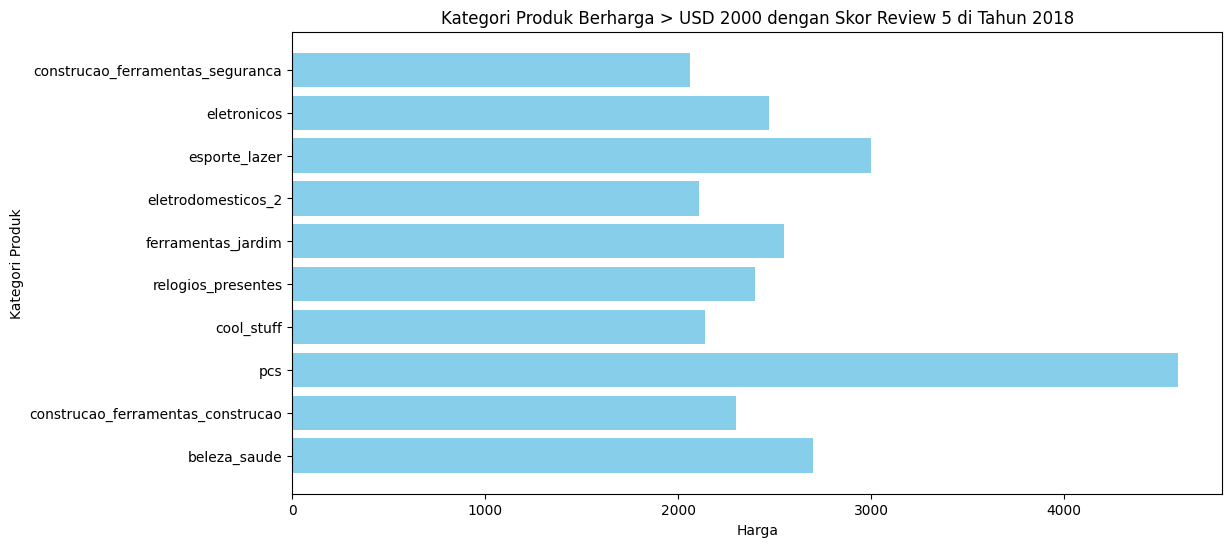

In [148]:
categories = unique_categories['product_category_name']
prices = unique_categories['price']

plt.figure(figsize=(12, 6))
plt.barh(categories, prices, color='skyblue')
plt.xlabel('Harga')
plt.ylabel('Kategori Produk')
plt.title('Kategori Produk Berharga > USD 2000 dengan Skor Review 5 di Tahun 2018')
plt.gca().invert_yaxis()
plt.show()

### Metode pembayaran apa yang paling banyak digunakan pelanggan untuk membeli barang berharga USD 1000?




> Mendapatkan kolom yang akan digunakan


In [149]:
price_gt_1000_payment_type_df[['product_category_name','price','payment_type']]

,product_category_name,price,payment_type
0,relogios_presentes,1200,credit_card
1,automotivo,1788,credit_card
2,telefonia,1099,credit_card
3,eletrodomesticos_2,1148,credit_card
4,eletroportateis,1399,credit_card
...,...,...,...
125,construcao_ferramentas_ferramentas,1899,credit_card
126,bebes,2110,credit_card
127,cool_stuff,3109,credit_card
128,automotivo,1332,credit_card




> Mendapatkan jumlah total payment_type



In [150]:
price_gt_1000_payment_type_df.groupby(by="payment_type").product_id.nunique().sort_values(ascending=False)

payment_type
credit_card    88
boleto          9
debit_card      4
voucher         4
Name: product_id, dtype: int64



> Membuat visualisasi berupa pie chart



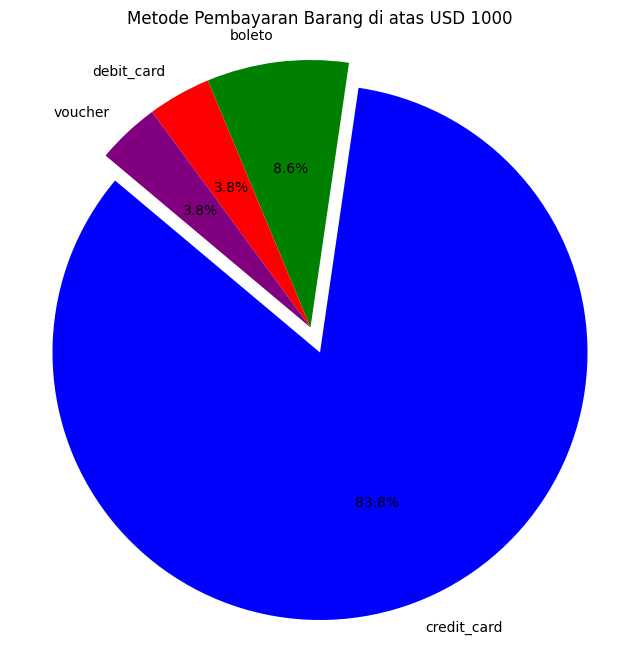

In [151]:
# Data
payment_types = ['credit_card', 'boleto', 'debit_card', 'voucher']
total_payments = [88, 9, 4, 4]

# Warna yang akan digunakan pada setiap bagian pie chart
colors = ['blue', 'green', 'red', 'purple']

# Explode: Untuk memisahkan sebagian potongan pie (opsional)
explode = (0.1, 0, 0, 0)  # Pemisahan potongan pertama (credit_card)

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_payments, labels=payment_types, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat lingkaran menjadi bundar

# Menambahkan judul
plt.title('Metode Pembayaran Barang di atas USD 1000')

# Menampilkan pie chart
plt.show()

## Conclusion

Dari hasil analisis, dapat disimpulkan bahwa:
- Ada 10 kategori produk yang memiliki harga lebih dari USD 2000 dan mendapatkan skor review sebesar 5 selama tahun 2018. Ini menunjukkan bahwa meskipun produk-produk ini memiliki harga yang tinggi, pelanggan masih memberikan penilaian yang sangat positif terhadap kualitas dan kepuasan mereka terhadap produk-produk tersebut. Kombinasi dari harga tinggi dan skor review yang tinggi ini mungkin mencerminkan kualitas yang sangat baik dari produk-produk dalam kategori-kategori tersebut, yang dapat menarik perhatian calon pembeli yang mencari produk-produk berkualitas tinggi. Analisis ini dapat menjadi acuan yang berguna dalam strategi pemasaran dan penawaran produk di masa mendatang.
- Metode pembayaran yang paling banyak digunakan oleh pelanggan untuk produk dengan harga lebih dari USD 1000 adalah "credit_card" dengan jumlah transaksi sebanyak 88, yang jauh lebih dominan dibandingkan dengan metode pembayaran lainnya seperti "boleto," "debit_card," dan "voucher." Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih menggunakan kartu kredit sebagai metode pembayaran saat mereka membeli produk dengan nilai transaksi yang tinggi, mungkin karena kemudahan dan fleksibilitas yang ditawarkan oleh metode pembayaran ini.

In [153]:
all_df = pd.merge(
    left=products_data,
    right=orders_data_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
all_df

,product_id,product_category_name,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10,7.39,1,debit_card,...,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00
1,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112,9.54,1,credit_card,...,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00
2,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,a4425e2bccba621150a07a685cf063be,1,1835b56ce799e6a4dc4eddc053f04066,2018-06-29 14:57:15,41,13.87,1,credit_card,...,Entrega super rápida! \r\n,2018-06-30 00:00:00,2018-07-02 19:28:46,d436890d44092b00fcfcbdd7a168c240,delivered,2018-06-26 14:27:52,2018-06-26 14:57:15,2018-06-27 11:31:00,2018-06-29 16:18:52,2018-07-18 00:00:00
3,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,a4425e2bccba621150a07a685cf063be,2,1835b56ce799e6a4dc4eddc053f04066,2018-06-29 14:57:15,41,13.87,1,credit_card,...,Entrega super rápida! \r\n,2018-06-30 00:00:00,2018-07-02 19:28:46,d436890d44092b00fcfcbdd7a168c240,delivered,2018-06-26 14:27:52,2018-06-26 14:57:15,2018-06-27 11:31:00,2018-06-29 16:18:52,2018-07-18 00:00:00
4,d03bd02af9fff4b98f1c972315e5e9ef,moveis_decoracao,0a4581df52d24b72b87ae0feb1b11d08,1,0241d4d5d36f10f80c644447315af0bd,2018-05-16 13:50:45,79,18.14,1,credit_card,...,Chegou rápido e são lindos!,2018-05-22 00:00:00,2018-05-29 13:17:44,ac8d05674efe12528f6d96c507aac3bc,delivered,2018-05-11 13:28:31,2018-05-11 13:50:45,2018-05-15 16:11:00,2018-05-21 16:52:07,2018-05-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11581,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,87df71eb46077c66a8e53d4e92bc71ef,1,95f83f51203c626648c875dd41874c7f,2018-05-02 03:15:20,69,28.80,1,boleto,...,Recebi antes do prazo chegou corretamente,2018-05-08 00:00:00,2018-05-10 19:21:33,c0254dbd03486d74cdefd62c0e0155d3,delivered,2018-04-24 19:05:19,2018-04-25 03:15:20,2018-04-25 14:20:00,2018-05-07 20:47:39,2018-05-18 00:00:00
11582,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,a445af0d83713885b6b576796191b1fa,2,95f83f51203c626648c875dd41874c7f,2018-07-30 09:23:26,69,27.84,1,credit_card,...,Comprei a capa de sofá que já foi entregue ( q...,2018-08-02 00:00:00,2018-08-04 12:30:16,c0717bf8d4587e085bfb7bb4e8a52e33,delivered,2018-07-23 19:07:01,2018-07-24 10:31:44,2018-07-24 13:48:00,2018-07-27 17:24:37,2018-08-09 00:00:00
11583,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,ded23d37cdcc25b37b4473b7be770cb2,1,95f83f51203c626648c875dd41874c7f,2018-08-02 02:10:26,69,32.18,1,boleto,...,Adorei,2018-08-08 00:00:00,2018-08-08 15:44:45,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20 00:00:00
11584,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,4c460fdf49b517270b6258ba2d3c1ef9,1,439a47cc365d6e3bd526812ea9de3c29,2018-06-20 18:58:12,127,11.91,1,debit_card,...,"Produto de ótima qualidade, fiquei super feliz...",2018-06-17 00:00:00,2018-06-17 16:46:25,ffe82abbde8061e75c4c0b72f3b2accf,delivered,2018-06-14 18:37:58,2018-06-14 18:58:12,2018-06-15 14:17:00,2018-06-16 10:12:15,2018-06-29 00:00:00


In [154]:
all_df.to_csv("all_data.csv", index=False)